In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
numeric = train.select_dtypes(include='number').drop(columns=['Id'])

In [7]:
corr_matrix = numeric.corr()
print(corr_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

In [8]:
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_price)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


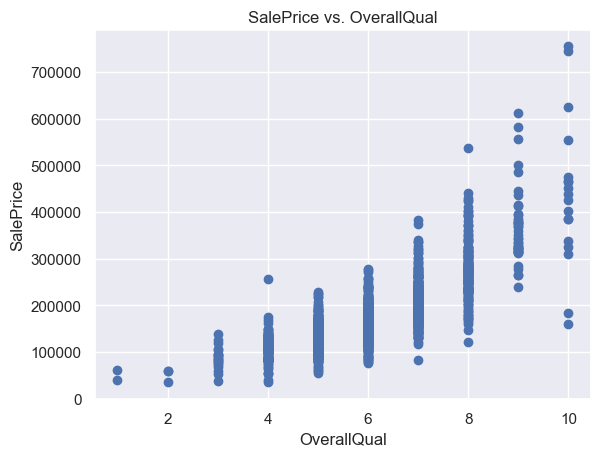

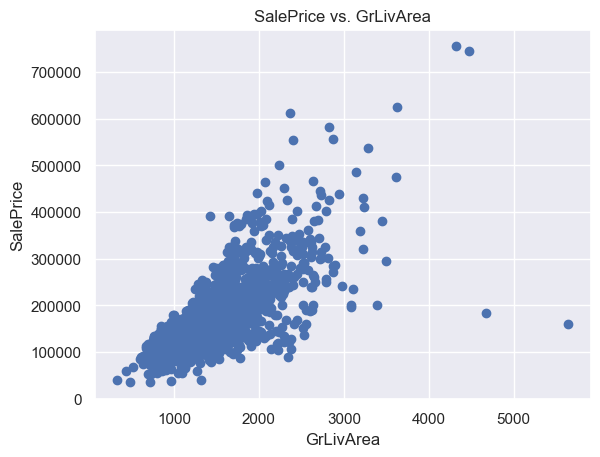

In [10]:
# Pick two top features
for feat in ['OverallQual', 'GrLivArea']:
    plt.figure()
    plt.scatter(train[feat], train['SalePrice'])
    plt.title(f'SalePrice vs. {feat}')
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.show()


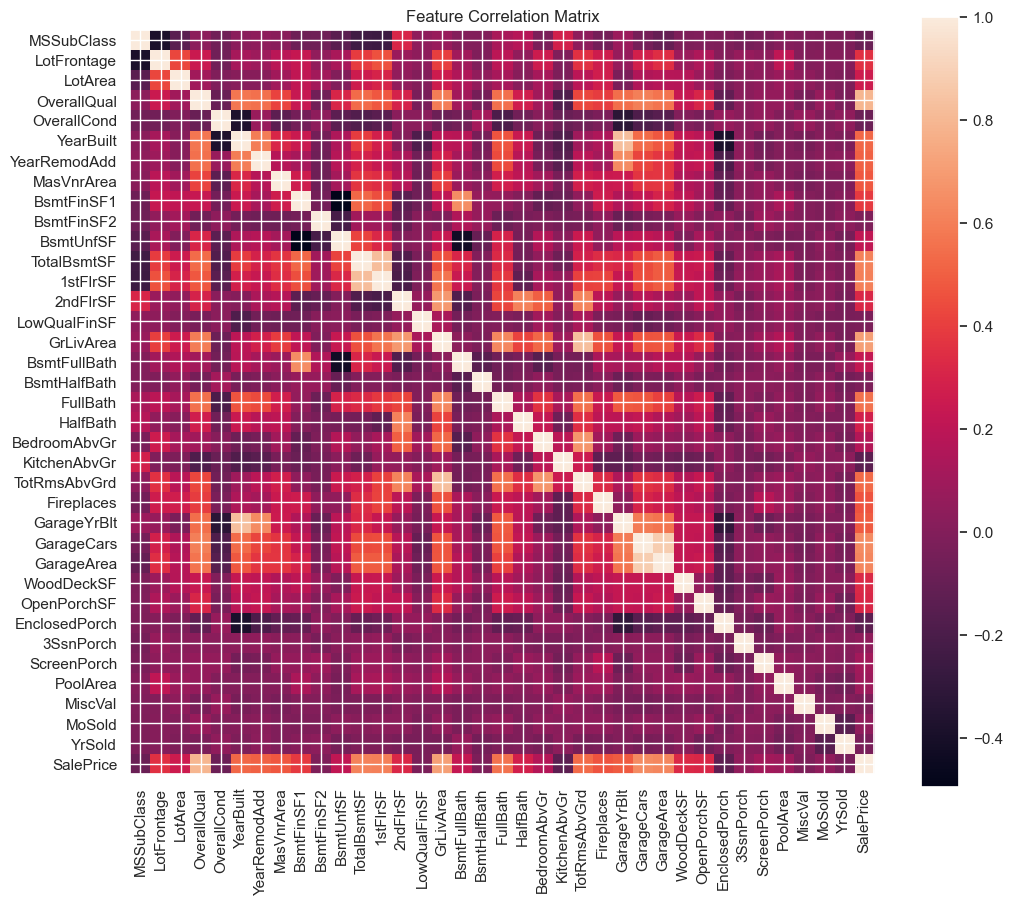

In [11]:
plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Feature Correlation Matrix')
plt.show()

In [12]:
# Count missing per column
missing = train.isnull().sum().sort_values(ascending=False)
# Show only those with >0 missing
print(missing[missing > 0])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [13]:
missing_percentage = train.isnull().sum() / len(train) * 100
print(missing_percentage[missing_percentage>19])

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [17]:
columns_to_drop = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','Id']
train = train.drop(columns=columns_to_drop)

In [18]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
train = train.drop(index=[1299, 524])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   LotShape       1458 non-null   object 
 6   LandContour    1458 non-null   object 
 7   Utilities      1458 non-null   object 
 8   LotConfig      1458 non-null   object 
 9   LandSlope      1458 non-null   object 
 10  Neighborhood   1458 non-null   object 
 11  Condition1     1458 non-null   object 
 12  Condition2     1458 non-null   object 
 13  BldgType       1458 non-null   object 
 14  HouseStyle     1458 non-null   object 
 15  OverallQual    1458 non-null   int64  
 16  OverallCond    1458 non-null   int64  
 17  YearBuilt      1458 non-null   int64  
 18  YearRemodAdd 

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [23]:

# Separate numeric & categorical
num_cols = train.select_dtypes(include='number').columns.drop('SalePrice')
cat_cols = train.select_dtypes(include='object').columns

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Fit & transform
train[num_cols] = num_imputer.fit_transform(train[num_cols])
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   float64
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   float64
 4   Street         1458 non-null   object 
 5   LotShape       1458 non-null   object 
 6   LandContour    1458 non-null   object 
 7   Utilities      1458 non-null   object 
 8   LotConfig      1458 non-null   object 
 9   LandSlope      1458 non-null   object 
 10  Neighborhood   1458 non-null   object 
 11  Condition1     1458 non-null   object 
 12  Condition2     1458 non-null   object 
 13  BldgType       1458 non-null   object 
 14  HouseStyle     1458 non-null   object 
 15  OverallQual    1458 non-null   float64
 16  OverallCond    1458 non-null   float64
 17  YearBuilt      1458 non-null   float64
 18  YearRemodAdd 

In [25]:
train = pd.get_dummies(train, columns=cat_cols, drop_first=True)

In [32]:
train['SalePrice_log'] = np.log1p(train['SalePrice'])

In [39]:
X = train.drop(['SalePrice', 'SalePrice_log'], axis=1) # Drop original SalePrice and keep transformed
y = train['SalePrice_log'] # Use the log-transformed target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Linear Regression RMSE: {rmse:,.0f}')


Linear Regression RMSE: 50,371


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf:,.0f}')


Random Forest RMSE: 24,244


In [41]:
# --- Linear Regression Model ---
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_log = lr.predict(X_val) # These are log-transformed predictions

# Calculate RMSE on the log-transformed scale
rmse_log = np.sqrt(mean_squared_error(y_val, y_pred_log))
print(f'Linear Regression RMSE (log-transformed SalePrice): {rmse_log:.4f}') # Print with more decimal places

# you'd need to inverse transform the predictions:
y_pred_original_scale = np.expm1(y_pred_log) # expm1 is exp(x)-1, inverse of log1p
rmse_original_scale = np.sqrt(mean_squared_error(np.expm1(y_val), y_pred_original_scale))
print(f'Linear Regression RMSE (original SalePrice scale, after inverse transform): {rmse_original_scale:,.0f}')


Linear Regression RMSE (log-transformed SalePrice): 0.2129
Linear Regression RMSE (original SalePrice scale, after inverse transform): 25,431


In [42]:
X = train.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = train['SalePrice_log'] # This is the crucial part: use the log-transformed target

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Linear Regression (as you ran it) ---
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_log_lr = lr.predict(X_val)
rmse_log_lr = np.sqrt(mean_squared_error(y_val, y_pred_log_lr))
print(f'Linear Regression RMSE (log-transformed SalePrice): {rmse_log_lr:.4f}')

y_pred_original_lr = np.expm1(y_pred_log_lr)
rmse_original_lr = np.sqrt(mean_squared_error(np.expm1(y_val), y_pred_original_lr))
print(f'Linear Regression RMSE (original SalePrice scale, after inverse transform): {rmse_original_lr:,.0f}')


# --- Random Forest with Log-Transformed SalePrice ---
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train) # Train RF on log-transformed target

y_pred_log_rf = rf.predict(X_val) # RF also outputs log-transformed predictions

# Calculate RMSE on the log-transformed scale for Random Forest
rmse_log_rf = np.sqrt(mean_squared_error(y_val, y_pred_log_rf))
print(f'Random Forest RMSE (log-transformed SalePrice): {rmse_log_rf:.4f}')

# Optionally, calculate RMSE on original scale for Random Forest too
y_pred_original_rf = np.expm1(y_pred_log_rf) # Inverse transform RF predictions
rmse_original_rf = np.sqrt(mean_squared_error(np.expm1(y_val), y_pred_original_rf))
print(f'Random Forest RMSE (original SalePrice scale, after inverse transform): {rmse_original_rf:,.0f}')

Linear Regression RMSE (log-transformed SalePrice): 0.2129
Linear Regression RMSE (original SalePrice scale, after inverse transform): 25,431
Random Forest RMSE (log-transformed SalePrice): 0.1450
Random Forest RMSE (original SalePrice scale, after inverse transform): 23,880


In [47]:
test = test.drop(columns=columns_to_drop)

In [48]:
# 2) Impute numeric & categorical (use the SimpleImputer objects you fitted on train)
test[num_cols] = num_imputer.transform(test[num_cols])
test[cat_cols] = cat_imputer.transform(test[cat_cols])

# 3) One‑hot encode (ensure you use the same dummy‐columns as train!)
test = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# 4) Align test to train columns (fills any missing dummies with 0)
test = test.reindex(columns=X.columns, fill_value=0)

In [49]:
predictions = rf.predict(test)
predictions = np.expm1(predictions)


In [50]:
submission = pd.DataFrame({
    'Id': test_ids,            # the original Id column from test.csv
    'SalePrice': predictions
})
submission.to_csv('submission.csv', index=False)